# matplotlib plotting in Python
Note, the content of this notebook is available as a tutorial in [datacamp.io](https://campus.datacamp.com/courses/intermediate-python-for-data-science/). This is just a quick reference sheet.

## Basic line plots - population growth

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Note**: You need `%matplotlib inline` command when plotting in Jupyter notebook. Not in scripts.
Additionally when runnning scripts, use the `plt.show()` to bring up the plot

Read the accompanying csv containing world population projection

In [2]:
pop_csv = pd.read_csv('world_pop_predictions.csv')
pop_csv.head()

,year,population
0,1950,2.53
1,1951,2.57
2,1952,2.62
3,1953,2.67
4,1954,2.71


Now that we have the data, let us read this dataframe into two lists, one for year and another for population. We could plot using pandas, but more of that later.

In [3]:
years = pop_csv.year
years = list(years)
pop = list(pop_csv.population)

Now let us create a simple line plot using matplotlib. Use `plot` command to create a line plot. 1st arg is X axis and 2nd is Y axis.

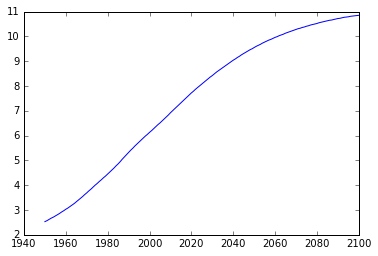

In [4]:
plt.plot(years, pop)

You can customize this by specifying color, width etc

#### Plot customization
You can add labels to axes, change the text displayed for labels and add title to the plot. 
**Note**: When running in scripts, call the `plt.show()` after adding the customizations to the plot

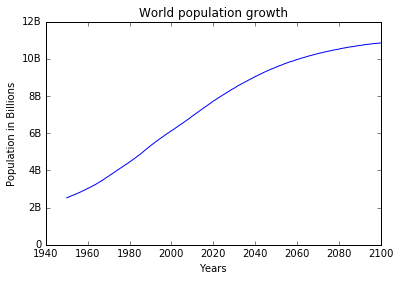

In [21]:
my_plot = plt.plot(years, pop) #storing in variable my_plot just to avoid prints to terminal
plt.xlabel('Years')
plt.ylabel('Population in Billions')
plt.title('World population growth')

#specify the ticks in first arg and labels for ticks in optional second arg
ticks = plt.yticks([0,2,4,6,8,10,12], 
           ['0','2B','4B','6B','8B','10B','12B'])


## Basic scatter
For making scatter plots, let us read the second csv containing world population, gdp per capita and life expectancy

In [23]:
pd_world_economics = pd.read_csv('world_gdp_pop_life_exp.csv')
pd_world_economics.head()

,Population_Billions,GDP_percap,life_exp
0,31.889923,974.580338,43.828
1,3.600523,5937.029526,76.423
2,33.333216,6223.367465,72.301
3,12.420476,4797.231267,42.731
4,40.301927,12779.379640,75.320


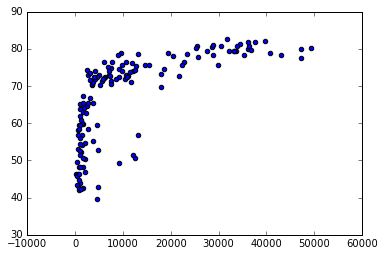

In [27]:
country_pop = list(pd_world_economics.Population_Billions)
gdp_cap = list(pd_world_economics.GDP_percap)
life_exp = list(pd_world_economics.life_exp)

# create a scatter plot of population and gdp per capita
my_scat = plt.scatter(gdp_cap, life_exp)

#### Changing the scale of an axis - log
The scatter above is not very useful since the scale of X axis and the dispersion of values is so varied. Let us represent this in log

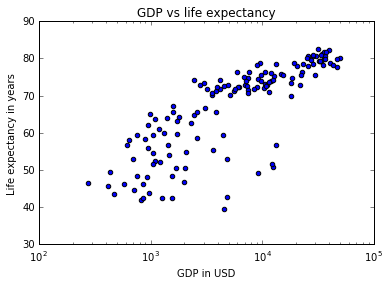

In [30]:
my_scat = plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
plt.title('GDP vs life expectancy')
plt.xlabel('GDP in USD')
plt.ylabel('Life expectancy in years')

#### Customizing the symbols drawn
Now let us try to represent the population column available to us. Use that to represent the size of the circles. In matplotlib, you cannot give conditional arguments for color or size. But need to create another list that contains the size and color for each of the variable.

So, let us create a size and color vector, both correspond to the population. To understand how the population is distributed, let us plot that as a histogram

In [31]:
len(country_pop)

142

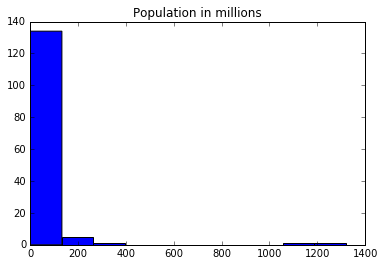

In [34]:
pop_hist = plt.hist(country_pop)
plt.title('Population in millions')

In [35]:
plt.hist?

In [5]:
import numpy as np
x = np.arange(1,21)
y = np.power(x,4)
print(y[-1])

160000


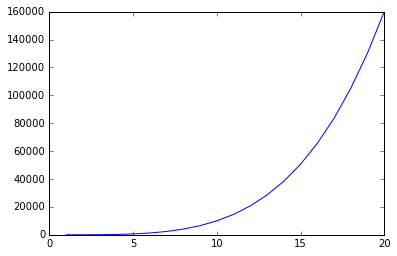

In [6]:
# Let us plot just to see how the graph looks like
plt.plot(x,y)

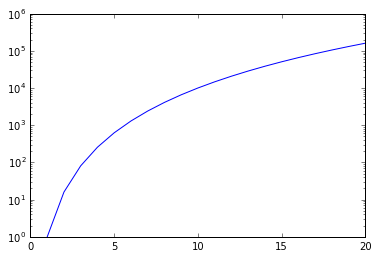

In [7]:
# now you can plot the log of y just by changing the scale of y axis
plt.yscale('log')
plt.plot(x,y)

Setting `yscale('log')` plots the log of that variable, but leaves the axis in original values. This can be a bit misleading

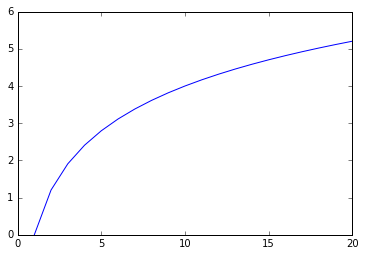

In [8]:
plt.plot(x,np.log10(y))

Above, we plot the log of y. As log to the base 10 goes, 

    log10(10) = 1
    log10(100) = 2
    log10(1000) = 3

and so on..

## Basic scatter plots
Use `plt.scatter(x,y)` to create a scatter plot

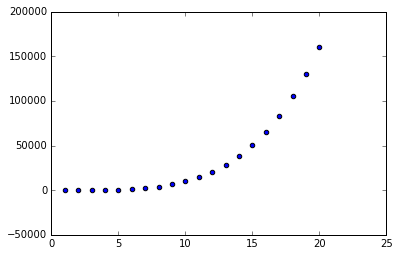

In [9]:
plt.scatter(x,y)

Scatter plots make much more sense if you try to plot phenomena that is not derived of another and to find if there is a correlation between the two. Below let us test it by plotting `x` against another set of random numbers generated using numpy

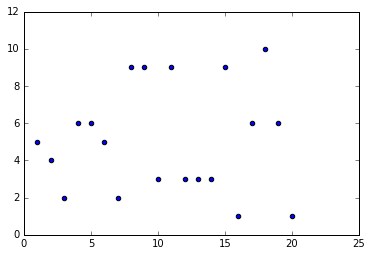

In [13]:
random_numbers = np.random.randint(1, 11, 20) #random numbers falling between 1 through 10
plt.scatter(x,random_numbers)

## Basic histograms
Histograms plot the frequency of a variable. The values of the variable is in X axis and number of occurrences in that range in is Y. By default, the `plt.hist()` function bins it into 10 groups, but you can customize it to be meaningful:

(array([ 2.,  2.,  4.,  1.,  2.,  4.,  0.,  0.,  4.,  1.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

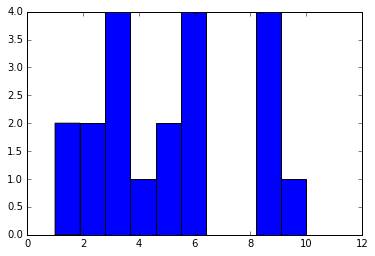

In [14]:
# let us make a histogram of the random numbers we generated
plt.hist(random_numbers)

(array([ 4.,  5.,  6.,  0.,  5.]),
 array([  1. ,   2.8,   4.6,   6.4,   8.2,  10. ]),
 <a list of 5 Patch objects>)

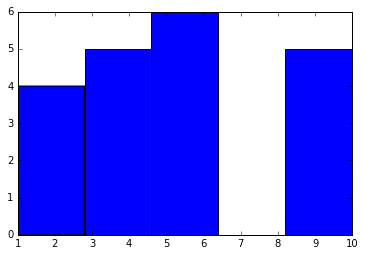

In [15]:
# lets reduce the bins to 5
plt.hist(random_numbers, 5)

Adjusting the bins as above shows the values to be approximately normally distributed which we would have missed with earlier binning